# HW07: 7주차 과제

## 과제 개요

| <그림 2> |<그림 8> |<그림 10> | <그림 12> |
|:-----|:-----|:-----|:-----|
| ![cctv_2018](https://user-images.githubusercontent.com/10287629/95750485-2ea58200-0cd8-11eb-8941-67f9268806cf.png)    |![cctv_ratio_both](https://user-images.githubusercontent.com/10287629/95750489-2fd6af00-0cd8-11eb-8625-1d7119ad3ea6.png)    |![fig10](https://user-images.githubusercontent.com/10287629/96718648-47521e00-13e3-11eb-8e67-37efc13622f4.png)    |![fig12](https://user-images.githubusercontent.com/10287629/96718652-47eab480-13e3-11eb-932f-1cd0d2fe63b4.png)|

- 제출물
    - 쥬피터 노트북 파일: `hw07_학번_이름.ipynb`
    - CCTV 데이터 파일:   `hw07_학번_이름_CCTV.xlsx`
    - 인구 데이터 파일:   `hw07_학번_이름_pop_2015.txt` 및 `hw07_학번_이름_pop_2018.txt`

- 채점표

**번호**|**시각화 요구 사항**|**배점**|**자가 채점**|**비고**
:-----:|:-----:|-----:|-----:|:-----:
1|<표 1>|1.0|1.0| CCTV 데이터의 동일성 확인
2|<표 2>|1.0|1.0| 인구 데이터의 동일성 확인
3|<표 3>|1.0|1.0| 병합 데이터의 동일성 확인
4|<그림 2>|6.0|6.0|CCTV 규모 단일 막대그래프
5|<그림 8>|5.0|5.0|CCTV 비율 subplot sbs stacked
6|<그림 10>|6.0|6.0|산점도 18
7|<그림 12>|4.0|4.0|산점도 moving 15 18
8|노트북 파일 제출|1.0|1.0| -
9|CCTV 데이터 파일 제출|0.5|0.5| -
a|인구 데이터 파일 제출|0.5|0.5| -
b|소감|1.0|1.0| -
c|전체적 완성도|3.0|3.0| -
**합계**|**-**|**30.0**|**30.0**|**-**

## [문제 1] 서울시 CCTV 현황


In [1]:
import pandas as pd
%matplotlib inline

In [2]:
# [문제 1] CCTV 데이터 일기

# 1) CCTV 데이터 엑셀 파일 읽어오기
CCTV_Seoul_new = pd.read_excel('CCTV_in_Seoul_new.xlsx')  # encoding 지정 불필요

# 2) 열 이름 변경(기관명을 자치구로 변경)
CCTV_Seoul_new.rename(
    columns={'기관명': '자치구'},
    inplace=True)  # inplace 옵션으로 원본을 직접 수정

# 3) 널 값을 포함한 행이 존재하면 널 값을 0으로 치환
if CCTV_Seoul_new.isnull().values.any():
    print(f'fillna() 호출 전, 널 값이 포함된 행: \n{CCTV_Seoul_new[ CCTV_Seoul_new.isnull().any(axis=1) ]}')
    CCTV_Seoul_new.fillna(0, inplace=True)    
    print(f'fillna() 호출 후, 널 값이 포함된 행: \n{CCTV_Seoul_new[ CCTV_Seoul_new.isnull().any(axis=1) ]}')
    
# 4) 2015년 소계 및 2018년 소계를 집계
col_list = ['2011년 이전', '2012년', '2013년', '2014년', '2015년']
CCTV_Seoul_new['CCTV 규모 2015'] = CCTV_Seoul_new[col_list].sum(axis='columns')
# 2018 소계는 기존 '소계'열과 동일하므로 이름만 변경해도 됨
col_list = ['CCTV 규모 2015', '2016년', '2017년', '2018년']
CCTV_Seoul_new['CCTV 규모 2018'] = CCTV_Seoul_new[col_list].sum(axis='columns')

# 5) 나머지 열 삭제(남길 열만 저장하는 방식으로)
CCTV_Seoul_new = CCTV_Seoul_new[['자치구', 'CCTV 규모 2015', 'CCTV 규모 2018']]
# col_list = ['소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년']
# CCTV_Seoul_new.drop(col_list, axis=1, inplace=True)

# 6) '자치구' 열 내부의 공백 제거 (아래 두 명령 모두 가능함)
# CCTV_Seoul_new['자치구'] = CCTV_Seoul_new['자치구'].str.replace(' ', '')  # inplace 옵션 사용 불가
CCTV_Seoul_new['자치구'].replace(' ','', regex=True, inplace=True)

# 7) 결과 출력
print('\n[문제 1] <표 1> 서울시 CCTV 현황')
CCTV_Seoul_new

fillna() 호출 전, 널 값이 포함된 행: 
      자치구    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
10   동대문구  2003       NaN    NaN    NaN   1326    111    233    136    197
24  중 랑 구  1068       NaN    NaN    NaN    770    102    121     66      9
fillna() 호출 후, 널 값이 포함된 행: 
Empty DataFrame
Columns: [자치구, 소계, 2011년 이전, 2012년, 2013년, 2014년, 2015년, 2016년, 2017년, 2018년]
Index: []

[문제 1] <표 1> 서울시 CCTV 현황


,자치구,CCTV 규모 2015,CCTV 규모 2018
0,강남구,3431.0,5221.0
1,강동구,1027.0,1879.0
2,강북구,691.0,1265.0
3,강서구,909.0,1617.0
4,관악구,2001.0,3985.0
5,광진구,746.0,1581.0
6,구로구,1875.0,3227.0
7,금천구,769.0,1634.0
8,노원구,1342.0,1906.0
9,도봉구,515.0,858.0


## [문제 2] 서울시 인구 현황

In [3]:
# [문제 2] 
def read_pop(year):
    # 인구 읽기
    pop = pd.read_csv(
        'population_in_Seoul_'+str(year)+'.txt',  # 수강생의 경우에는 'hw07_학번_이름_pop_2015.txt' 
        sep = '\t',
        thousands = ',',   # 천 단위 구분 쉼표 처리
        header = 2,        # 2번 행을 헤더로 지정
        usecols=['자치구', '계', '계.1', '계.2', '65세이상고령자'], # 지정 열만 읽어들이도록
        # encoding='utf-8', 
        )
    # 열 이름 변경
    pop.rename(columns={
        pop.columns[1] : '인구 규모 '+ str(year),
        pop.columns[2] : '한국인 '+ str(year),
        pop.columns[3] : '외국인 '+ str(year),
        pop.columns[4] : '고령자 '+ str(year)}, inplace=True)
    # 2널 값을 포함한 행 조사
    if pop.isnull().values.any():
        print(f'fillna() 호출 전, 널 값이 포함된 행: \n{pop[pop.isnull().any(axis=1)]}')
        pop.fillna(0, inplace=True)   
        print(f'fillna() 호출 후, 널 값이 포함된 행: \n{pop[pop.isnull().any(axis=1)]}')

    # 외국인 및 고령자 비율 계산
    pop['외국인 비율 '+ str(year)] = pop['외국인 '+ str(year)] / pop['인구 규모 '+ str(year)] * 100.0
    pop['고령자 비율 '+ str(year)] = pop['고령자 '+ str(year)] / pop['인구 규모 '+ str(year)] * 100.0

    # 합계 행 삭제
    rows = pop[ pop['자치구'] == '합계' ].index
    pop.drop(rows, inplace=True)  # 합계 행을 삭제
    
    return pop

In [4]:
pop_Seoul_2015 = read_pop(2015)  # 1) 2015 인구 획득
pop_Seoul_2018 = read_pop(2018)  # 2) 2018 인구 획득
pop_Seoul_new = pd.merge(        # 3) 2015 인구와 2018 인구 df 병합 
    pop_Seoul_2015, pop_Seoul_2018, how='outer', on='자치구')

print('<표 2> 2015 및 2018 인구')
pop_Seoul_new  # <표 2> 출력

<표 2> 2015 및 2018 인구


,자치구,인구 규모 2015,한국인 2015,외국인 2015,고령자 2015,외국인 비율 2015,고령자 비율 2015,인구 규모 2018,한국인 2018,외국인 2018,고령자 2018,외국인 비율 2018,고령자 비율 2018
0,종로구,163822,154986,8836,24892,5.393659,15.194540,163026,153065,9961,26742,6.110068,16.403518
1,중구,134329,125733,8596,20302,6.399214,15.113639,135633,125725,9908,22005,7.305007,16.223928
2,용산구,247909,233342,14567,35715,5.875946,14.406496,245090,228999,16091,37640,6.565343,15.357624
3,성동구,305065,297003,8062,38164,2.642715,12.510121,316463,308221,8242,42767,2.604412,13.514060
4,광진구,375180,360369,14811,40368,3.947705,10.759635,371063,355559,15504,45619,4.178266,12.294139
5,동대문구,373824,360153,13671,52490,3.657069,14.041367,364338,348052,16286,57165,4.470025,15.690101
6,중랑구,418620,413909,4711,54095,1.125364,12.922221,408147,403209,4938,61830,1.209858,15.148954
7,성북구,469560,459275,10285,63281,2.190348,13.476659,447687,435868,11819,67782,2.640014,15.140489
8,강북구,334426,330873,3553,52598,1.062417,15.727844,322915,319164,3751,58196,1.161606,18.022080
9,도봉구,353241,351242,1999,48590,0.565903,13.755481,341649,339413,2236,55964,0.654473,16.380554


## [문제 3] CCTV 데이터와 인구 데이터의 병합

In [5]:
# [문제 3]

# 1) 인구와 CCTV 병합
cctv_with_pop = pd.merge(pop_Seoul_new, CCTV_Seoul_new, how='outer', on='자치구')

# 2) 자치구를 인덱스로 설정
cctv_with_pop.set_index('자치구', inplace=True)

print('<표 3> 인구와 CCTV 병합된 결과')
cctv_with_pop.head(5)

<표 3> 인구와 CCTV 병합된 결과


,인구 규모 2015,한국인 2015,외국인 2015,고령자 2015,외국인 비율 2015,고령자 비율 2015,인구 규모 2018,한국인 2018,외국인 2018,고령자 2018,외국인 비율 2018,고령자 비율 2018,CCTV 규모 2015,CCTV 규모 2018
자치구,,,,,,,,,,,,,,
종로구,163822,154986,8836,24892,5.393659,15.194540,163026,153065,9961,26742,6.110068,16.403518,941.0,1471.0
중구,134329,125733,8596,20302,6.399214,15.113639,135633,125725,9908,22005,7.305007,16.223928,629.0,1544.0
용산구,247909,233342,14567,35715,5.875946,14.406496,245090,228999,16091,37640,6.565343,15.357624,1841.0,2063.0
성동구,305065,297003,8062,38164,2.642715,12.510121,316463,308221,8242,42767,2.604412,13.514060,1251.0,2679.0
광진구,375180,360369,14811,40368,3.947705,10.759635,371063,355559,15504,45619,4.178266,12.294139,746.0,1581.0


## [문제 4] <그림 2> CCTV 규모 시각화

- <그림 2>를 시각화하는 부분이 문제 4에 해당하며, 세부적인 채점 기준은 다음과 같다.
    - (1.0 점) 차트 제목
    - (1.0 점) x 축 제목
    - (1.0 점) y 축 제목
    - (1.0 점) x 축 눈금 범위
    - (1.0 점) y 축 눈금 순서(자치구 정렬)
    - (1.0 점) 막대 길이(데이터 정확성)

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import platform

# rc(runtime configuration)를 사전 형태로 저장한 rcParams
from matplotlib import font_manager, rc
# '-' 표시를 unicode minus 문자(True)로 할지, 아니면 ASCII hyphen 문자(False)로 할지
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':        # MAC OS X
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':     # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

<그림 2> 2018 CCTV 규모


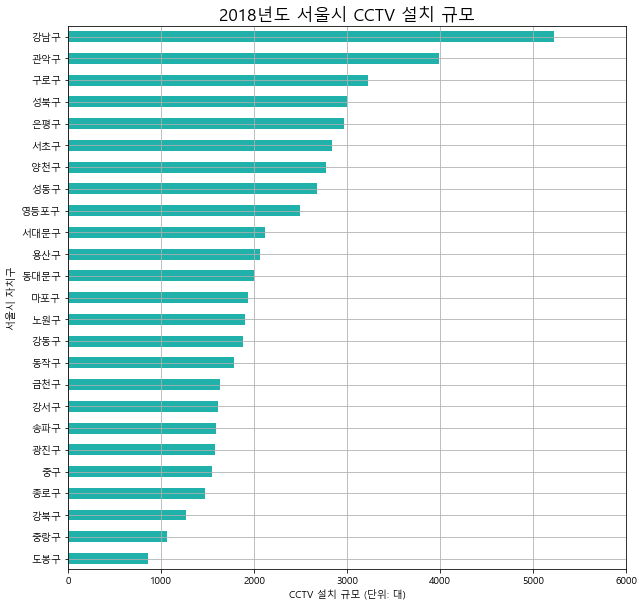

In [7]:
# [문제 4] <그림 2> 2018 CCTV 규모 시각화
# 2018년도 CCTV 현황
print('<그림 2> 2018 CCTV 규모')
fig = plt.figure()
# 4.5) y 축 눈금 순서(자치구 정렬) 
# 4.6) 막대 길이(데이터 정확성) 
cctv_with_pop['CCTV 규모 2018']\
    .sort_values(ascending=True)\
    .plot(kind='barh', grid=True, color='lightseagreen', figsize=(10, 10))

plt.title('2018년도 서울시 CCTV 설치 규모', fontsize=17)                     # 4.1) 차트 제목
plt.xlabel('CCTV 설치 규모 (단위: 대)')                                      # 4.2) x 축 제목
plt.ylabel('서울시 자치구')                          # 선 plot(), 후 label() # 4.3) y 축 제목 
plt.xlim(0, 6000)                                                            # 4.4) x 축 눈금 범위 
plt.savefig('./cctv_2018.png')
plt.show()  # 자치구 열을 인덱스 열로 변경한 이유가 짐작이 되는지?

## [문제 5] <그림 8> 두 연도를 단일 차트로 시각화

- <그림 8>을 시각화하는 부분이 문제 5에 해당하며, 세부적인 채점 기준은 다음과 같다.
    - (0.5 점) 서브플롯 적용
    - (1.0 점) 나란히 놓은 막대 차트
    - (1.0 점) 쌓아 올린 막대 차트
    - (0.5 점) 그림 전체와 두 차트의 제목
    - (0.5 점) x 축 제목 및 y 축 제목
    - (0.5 점) x 축 눈금 범위
    - (0.5 점) y 축 눈금 순서(자치구 정렬)
    - (0.5 점) 막대 길이(데이터 정확성)

In [8]:
# 인구 대비 CCTV 비율 계산
cctv_with_pop['CCTV 비율 2015'] = cctv_with_pop['CCTV 규모 2015'] / cctv_with_pop['인구 규모 2015'] * 100
cctv_with_pop['CCTV 비율 2018'] = cctv_with_pop['CCTV 규모 2018'] / cctv_with_pop['인구 규모 2018'] * 100
# cctv_with_pop.head(3)

In [9]:
### 2015/2018 CCTV 비율 (나란히 놓은 방식)
# 2015 및 2018년도 CCTV 비율 (side-by-side)
cctv_ratio = cctv_with_pop.loc[:, ['CCTV 비율 2015', 'CCTV 비율 2018']]
cctv_ratio.sort_values('CCTV 비율 2018', ascending=True, inplace=True)

In [10]:
### 2015/2018 CCTV 비율 (쌓아 올린 방식)
# 2015 및 2018년도 CCTV 현황 (stacked)
cctv_stacked = cctv_with_pop.loc[:, ['CCTV 비율 2015', 'CCTV 비율 2018']]
cctv_stacked['CCTV 2015'] = cctv_stacked['CCTV 비율 2015']
cctv_stacked['CCTV 2018'] = cctv_stacked['CCTV 비율 2018'] - cctv_stacked['CCTV 비율 2015']
cctv_stacked.sort_values('CCTV 비율 2018', ascending=True, inplace=True)

<그림 8>


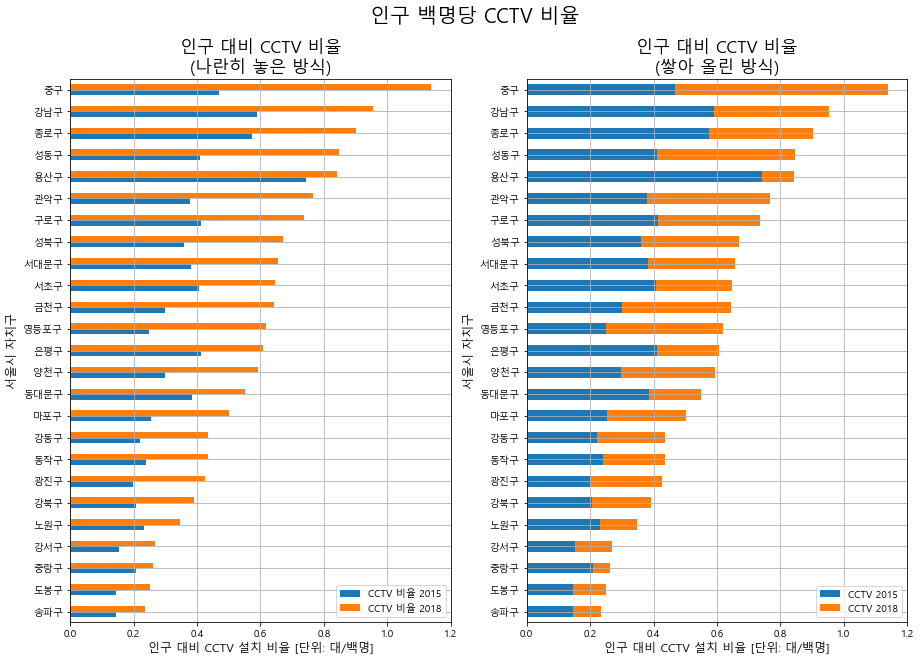

In [11]:
# df.plot()으로 subplot 작성
fig = plt.figure(figsize=(15,10))
fig.suptitle('인구 백명당 CCTV 비율', fontsize=20)

# 왼쪽에 sbs
ax1 = fig.add_subplot(121)
ax1.set_title('인구 대비 CCTV 비율\n(나란히 놓은 방식)', fontsize=17)
cctv_ratio.plot(kind='barh', grid=True, ax=ax1)
ax1.set_xlim([0.0, 1.2])
plt.xlabel('인구 대비 CCTV 설치 비율 [단위: 대/백명]', fontsize=12)
plt.ylabel('서울시 자치구', fontsize=12)

# 오른쪽에 stacked
ax2 = fig.add_subplot(122)
ax2.set_title('인구 대비 CCTV 비율\n(쌓아 올린 방식)', fontsize=17)
cctv_stacked[['CCTV 2015', 'CCTV 2018']].plot(kind='barh', stacked=True, grid=True, ax=ax2)
ax2.set_xlim([0.0, 1.2])
plt.xlabel('인구 대비 CCTV 설치 비율 [단위: 대/백명]', fontsize=12)
plt.ylabel('서울시 자치구', fontsize=12)

fig.savefig('./cctv_ratio_both.png')

print('<그림 8>')
plt.show()

## [문제 6] <그림 10> 2018 인구-CCTV 산점도

- <그림 10>을 시각화하는 부분이 문제 6에 해당하며, 세부적인 채점 기준은 다음과 같다.
    - (0.5 점) 차트 제목
    - (0.5 점) x 축 제목 및 y 축 제목
    - (1.0 점) y 축 눈금 범위
    - (0.5 점) 회귀선 정확도
    - (0.5 점) 색상 조견 막대
    - (1.0 점) 원의 중심 위치(인구 및 CCTV 데이터 정확도)
    - (1.0 점) 원의 크기(CCTV 비율 데이터 정확도)
    - (1.0 점) 원의 색상(회귀 오차 데이터 정확도)

In [12]:
# 2018 회귀선
import numpy as np
# numpy.polyfit(x, y, 차수)
pf = np.polyfit(cctv_with_pop['인구 규모 2018'],    # 추정에 사용할 x 좌표 값
                cctv_with_pop['CCTV 규모 2018'],    # 추정에 사용할 y 좌표 값
                1)                                  # 1차원(직선 형태) 다항식
# y 축
fy = np.poly1d(pf)  
# x 축
fx = np.linspace(100000, 700000, 100)  
# 추정 오차
cctv_with_pop['오차 2018'] = np.abs(
    cctv_with_pop['CCTV 규모 2018'] - fy(cctv_with_pop['인구 규모 2018']))

<그림 10> 2018 산점도


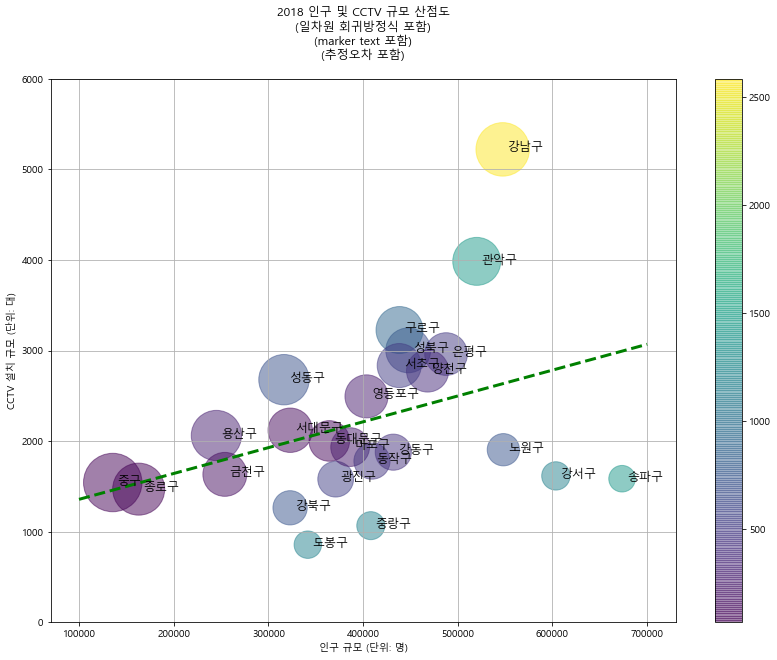

In [13]:
# 2018 산점도

plt.figure(figsize=(14,10))
# 제목
plt.title('2018 인구 및 CCTV 규모 산점도\n(일차원 회귀방정식 포함)\n(marker text 포함)\n(추정오차 포함)\n')    
plt.xlabel('인구 규모 (단위: 명)')
plt.ylabel('CCTV 설치 규모 (단위: 대)')
plt.grid()


plt.plot(fx, fy(fx), ls='dashed', lw=3, color='g')  # 회귀선 그리기

# 산점도 그리기
plt.ylim(0, 6000)
plt.scatter(cctv_with_pop['인구 규모 2018'],         # 중심 x
            cctv_with_pop['CCTV 규모 2018'],         # 중심 y
            s=3000*cctv_with_pop['CCTV 비율 2018'],  # 마커 크기
            c=cctv_with_pop['오차 2018'],            # 마커 색상 (오차 데이터를 마커 색상으로 지정)
            alpha=.5
           )

# 마커 옆에 구 이름 출력
for n in range(len(cctv_with_pop)):  # df_sort 행 개수만큼 반복
    plt.text(cctv_with_pop['인구 규모 2018'][n] + 5000,  # 텍스트 위치 x (마커 위치 x보다 약간 오른쪽)
             cctv_with_pop['CCTV 규모 2018'][n] - 20,    # 텍스트 위치 y (마커 위치 y보다 약간 아래쪽)
             cctv_with_pop.index[n],                     # 텍스트 내용 (구 이름)
             fontsize=12)                                # 폰트 크기

plt.colorbar()                                      # 색상 조견 막대 (수직 방향이 기본값)

print('<그림 10> 2018 산점도')
plt.show()

## [문제 7] <그림 12> 두 연도를 단일 차트로 시각화
- <그림 12>를 시각화하는 부분이 문제 7에 해당하며, 세부적인 채점 기준은 다음과 같다.
    - (1.0 점) 2018년 데이터에 해당하는 거품(원) 시각화의 정확도
    - (1.0 점) 2015년 데이터에 해당하는 거품(원) 시각화의 정확도
    - (2.0 점) 2015년 거품과 2018년 거품을 연결하는 선 시각화의 정확도

In [14]:
# 2015 회귀선
# numpy.polyfit(x, y, 차수)
pf2015 = np.polyfit(cctv_with_pop['인구 규모 2015'],    # 추정에 사용할 x 좌표 값
                cctv_with_pop['CCTV 규모 2015'],    # 추정에 사용할 y 좌표 값
                1)                                  # 1차원(직선 형태) 다항식
# y 축
fy2015 = np.poly1d(pf2015)  
# x 축
fx2015 = np.linspace(100000, 700000, 100)
# 추정 오차
cctv_with_pop['오차 2015'] = np.abs(
    cctv_with_pop['CCTV 규모 2015'] - fy2015(cctv_with_pop['인구 규모 2015']))

In [15]:
# 이동 거리 계산
cctv_with_pop['이동 거리'] = np.sqrt(
      (cctv_with_pop['인구 규모 2018'] - cctv_with_pop['인구 규모 2015'])**2 
    + (100 * (cctv_with_pop['CCTV 규모 2018'] - cctv_with_pop['CCTV 규모 2015']))**2
    )
max_distance=cctv_with_pop['이동 거리'].max()

<그림 12>


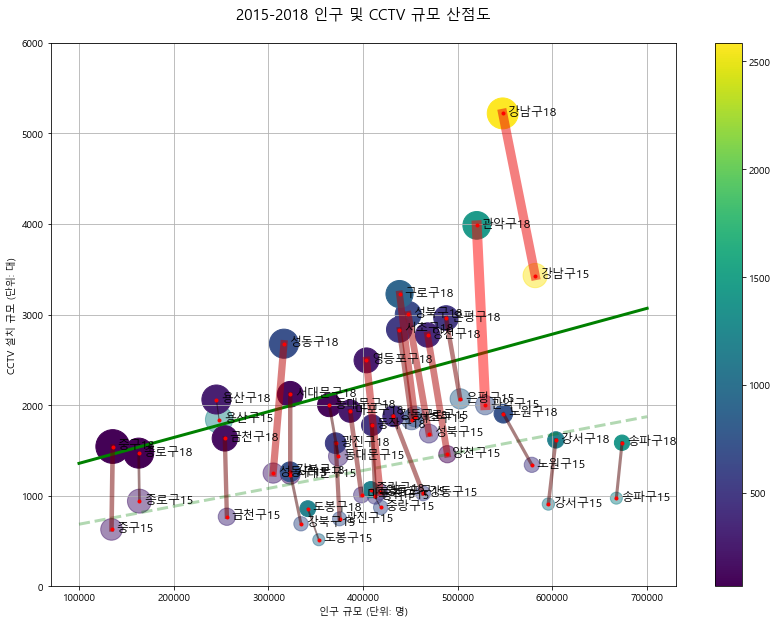

In [16]:
# 단일 산점도 시각화

plt.figure(figsize=(14,10))
plt.ylim(0, 6000)

# 2015 산점도 그리기
plt.scatter(cctv_with_pop['인구 규모 2015'],         # x
            cctv_with_pop['CCTV 규모 2015'],         # y
            c=cctv_with_pop['오차 2015'],            # 마커 색상 (오차 데이터를 마커 색상으로 지정)
            s=1000*cctv_with_pop['CCTV 비율 2015'],  # 마커 크기
            alpha=.5
           )
# 2015 추세선 그리기
plt.plot(fx2015, fy2015(fx2015), ls='dashed', lw=3, color='g', alpha=.3)
# 2015 마커 옆에 구 이름 출력
for n in range(len(cctv_with_pop)):  # df 행 개수만큼 반복
    plt.text(cctv_with_pop['인구 규모 2015'][n] + 5000,  # 텍스트 위치 x (마커 위치 x보다 약간 오른쪽)
             cctv_with_pop['CCTV 규모 2015'][n] - 20,    # 텍스트 위치 y (마커 위치 y보다 약간 아래쪽)
             cctv_with_pop.index[n]+'15',                # 텍스트 내용 (구 이름)
             fontsize=12)                                # 폰트 크기

# 2018 산점도 그리기
plt.scatter(cctv_with_pop['인구 규모 2018'],         # x
            cctv_with_pop['CCTV 규모 2018'],         # y
            c=cctv_with_pop['오차 2018'],            # 마커 색상 (오차 데이터를 마커 색상으로 지정)
            s=1000*cctv_with_pop['CCTV 비율 2018'],  # 마커 크기
            alpha=1.0
           )
# 2018 추세선 그리기
plt.plot(fx, fy(fx), ls='-', lw=3, color='g')
# 2018 마커 옆에 구 이름 출력
for n in range(len(cctv_with_pop)):  # df 행 개수만큼 반복
    plt.text(cctv_with_pop['인구 규모 2018'][n] + 5000,  # 텍스트 위치 x (마커 위치 x보다 약간 오른쪽)
             cctv_with_pop['CCTV 규모 2018'][n] - 20,    # 텍스트 위치 y (마커 위치 y보다 약간 아래쪽)
             cctv_with_pop.index[n]+'18',                # 텍스트 내용 (구 이름)
             fontsize=12)                                # 폰트 크기

# 자치구 이동 궤적 출력
for n in range(len(cctv_with_pop)):  # df 행 개수만큼 반복
    distance = cctv_with_pop['이동 거리'][n]
    x_values = [cctv_with_pop['인구 규모 2015'][n], cctv_with_pop['인구 규모 2018'][n]]
    y_values = [cctv_with_pop['CCTV 규모 2015'][n], cctv_with_pop['CCTV 규모 2018'][n]]
    plt.plot(x_values, y_values, 
             lw=distance/max_distance*10,                  # 이동 궤적 두께
             color=(distance/max_distance, 0, 0, 0.5))     # 이동 궤적 색상
    plt.plot(x_values, y_values, 'o', color='red', markersize=3)

    
plt.colorbar() # 색상 조견 막대 (수직 방향이 기본값)

plt.title('2015-2018 인구 및 CCTV 규모 산점도\n', fontsize=15)    
plt.xlabel('인구 규모 (단위: 명)')
plt.ylabel('CCTV 설치 규모 (단위: 대)')
plt.grid()

print('<그림 12>')
plt.show()